<br>

### 필요한 모듈

``` python
!pip install cmake
!pip install dlib
!pip install face_recognition --user
```

<br>

<br>

### 시각화를 위한 데이터 저장 <br>

임베딩을 위해 전처리 단계에서 crop 한 얼굴 이미지 데이터를 PIL 라이브러리의 Image.fromarray 로 PIL Image 로 변환하여 저장해 둔 뒤, 나중에 다양한 시각화를 시도해 볼 때 사용할 수 있습니다. <br>

```
#    from PIL import Image
#    face = get_gropped_face(image_path)
#    pillow_image = Image.fromarray(face)
#    pillow_image.save(path_to_save)
```

<br>

<br>

## 데이터 전처리 : Face detection <br>

얼굴 임베딩(embedding) 모델을 위한 입력 데이터로 '얼굴만' 잘 나타나도록 처리된 데이터 준비 <br>
얼굴 데이터를 생성하기 위한 전처리 작업에 얼굴 인식(Face detection) 모델을 이용.

>
dlib 라이브러리를 이용해 face detection 부터 face recognition 까지 사용하기 쉽게 미리 만들어 놓은 [face_recofnition](https://github.com/ageitgey/face_recognition) 이용
>

<br>

In [308]:
import face_recognition
import os
%matplotlib inline
import matplotlib.pyplot as plt

In [309]:
"""
face_recognition 라이브러리를 활용해
얼굴 영역 검출 되는지 확인하는 함수 작성
"""

def check_cropped_face(image_file_path):
    image = face_recognition.load_image_file(image_file_path)
    face_locations = face_recognition.face_locations(image)

    return face_locations[0]

In [310]:
"""
face_recognition 라이브러리를 활용해
얼굴 영역 이미지 데이터만 불러오는 함수 작성
"""

def get_cropped_face(image_file_path):
    image = face_recognition.load_image_file(image_file_path)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

(267, 268, 3)
face_location[0] :  (142, 379, 409, 111)


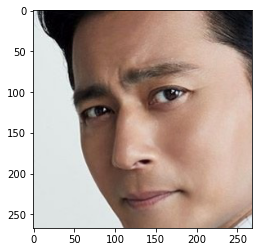

In [311]:
"""
얼굴 데이터만 불러오는 함수 작동 확인
"""

image_path = os.getenv('HOME')+'/aiffel/face_embedding/male_actors/장동건.jpeg'

cropped_face = get_cropped_face(image_path)
plt.imshow(cropped_face)

print(cropped_face.shape)

check_face = check_cropped_face(image_path)
print("face_location[0] : ", check_face)

<br>

## 이미지 임베딩 데이터 생성 <br>

face_recognition.face_encodings() 모듈로 임베딩된 데이터 생성 <br>
( 임베딩 : 원본 데이터를 벡터공간 위치좌표로 매핑하는 기능 ) <br><br>

face_recognition.face_encodings() 모듈에는 구글의 FaceNet 얼굴 임베딩 모델이 탑재되어 있습니다. <br>
이 모델을 사용하면 이미지 데이터로 부터 얼굴 임베딩 데이터를 생성할 수 있습니다.

<br>

In [312]:
"""
이미지 데이터 디렉토리 안의
이미지 이름 리스트로 불러오기
"""

import os

dir_path = os.getenv('HOME')+'/aiffel/face_embedding/male_actors'
file_list = os.listdir(dir_path)

print ("이미지 개수 : ", len(file_list), "\n")
print ("file_list: {}".format(file_list))

이미지 개수 :  564 

file_list: ['이정신.jpeg', '강성진.jpeg', '김범.jpeg', '이용주.jpeg', '송창의.jpeg', '이준혁.jpeg', '노주현.jpeg', '전무송.jpeg', '정석원.jpeg', '정우식.jpeg', '전진서.jpeg', '감우성.jpeg', '윤현민.jpeg', '서지석.jpeg', '정호빈.jpeg', '이서진.jpeg', '김권.jpeg', '정해인.jpeg', '김우빈.jpeg', '윤봉길.jpeg', '오현경.jpeg', '이준영.jpeg', '김민교.jpeg', '박원상.jpeg', '정성모.jpeg', '신현준.jpeg', '김강훈.jpeg', '이수완.jpeg', '윤문식.jpeg', '강정우.jpeg', '김남길.jpeg', '장승조.jpeg', '유태웅.jpeg', '김성균.jpeg', '윤주상.jpeg', '이선균.jpeg', '고세원.jpeg', '장광.jpeg', '배용준.jpeg', '오태경.jpeg', '문정혁.jpeg', '정성영.jpeg', '임호.jpeg', '이민우.jpeg', '유해진.jpeg', '조병규.jpeg', '장률.jpeg', '박기웅.jpeg', '조원희.jpeg', '기주봉.jpeg', '도경수.jpeg', '양동근.jpeg', '장근석.jpeg', '전지환.jpeg', '정택현.jpeg', '김영광.jpeg', '오만석.jpeg', '정만식.jpeg', '손창민.jpeg', '이계인.jpeg', '박보검.jpeg', '박건우.jpeg', '조덕현.jpeg', '이경영.jpeg', '유민규.jpeg', '권상우.jpeg', '오광록.jpeg', '오대규.jpeg', '정명준.jpeg', '김영호.jpeg', '임슬옹.jpeg', '김혜성.jpeg', '정우성.jpeg', '김영대.jpeg', '박희순.jpeg', '서지훈.jpeg', '이희도.jpeg', '도지한.jpeg', '박서준.jpeg', '정동화.jpeg', '류경수.jpeg', '주지훈.

In [313]:
"""
이미지 이름 리스트 중,
얼굴 검출 오류나는 이름 제거
"""

print("원본 이미지 개수 : ", len(file_list))
error_count = 0


for file in file_list:
    img_path = os.path.join(dir_path, file)
    try:
        check_cropped_face(img_path)
    except:
        file_list.remove(file)
        error_count += 1

print("얼굴 인식 오류 이미지 개수 : ",error_count)
print("1차 오류 제거 후 이미지 개수 : ", len(file_list))

원본 이미지 개수 :  564
얼굴 인식 오류 이미지 개수 :  29
1차 오류 제거 후 이미지 개수 :  535


In [314]:
"""
이미지 이름 리스트 중,
얼굴 검출 오류나는 이름 제거 한번 더 체크
( 이유는 알 수 없지만 한번에 error 가 완전히 검출되지 않음 )
"""

print("1차 오류 제거 후 이미지 개수 : ", len(file_list))
error_count = 0


for file in file_list:
    img_path = os.path.join(dir_path, file)
    try:
        check_cropped_face(img_path)
    except:
        file_list.remove(file)
        error_count += 1

print("얼굴 인식 오류 이미지 개수 : ",error_count)
print("2차 오류 제거 후 이미지 개수 : ", len(file_list))

1차 오류 제거 후 이미지 개수 :  535
얼굴 인식 오류 이미지 개수 :  1
2차 오류 제거 후 이미지 개수 :  534


In [315]:
"""
face_recognition 라이브러리의
face_encodings() 모듈을 사용해 이미지의 임베딩 데이터 생성
( FaceNet 임베딩 모델을 사용하므로 128차원 벡터가 생성됨 )
"""

image_file = os.path.join(dir_path, '김권.jpeg')
face = get_cropped_face(image_file)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현)

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
embedding

[array([-0.06422403,  0.08677705,  0.06544863, -0.02713477, -0.11380459,
        -0.01183961, -0.11654446, -0.10316752,  0.13723882, -0.13179566,
         0.16985989, -0.03551945, -0.17308405, -0.07112098, -0.02706862,
         0.1537015 , -0.11292128, -0.18970156, -0.03494235,  0.01729299,
         0.12521423,  0.00201617,  0.01143619,  0.00907932, -0.07074928,
        -0.31541392, -0.11438289, -0.08714577, -0.02767546, -0.03703514,
        -0.06635061,  0.02989777, -0.18411416, -0.04456292,  0.03259643,
         0.08267712,  0.03181107, -0.05962304,  0.14074306, -0.06168752,
        -0.25517344,  0.08601731,  0.04041572,  0.21379405,  0.16765259,
        -0.01845691,  0.04006653, -0.13253285,  0.16032408, -0.09961566,
         0.12682644,  0.14755163,  0.16888256,  0.05225076,  0.07870182,
        -0.12838033,  0.05685367,  0.13293207, -0.07528979,  0.0646378 ,
         0.11004189, -0.01631841,  0.02193664, -0.07596564,  0.18038423,
         0.05121332, -0.06210566, -0.27017722,  0.1

In [316]:
"""
face_recognition 라이브러리를 활용해 
{이름 : 임베딩벡터} 꼴의 dictionary로 이미지의 임베딩 데이터를 생성하는 함수 작성
"""

def get_face_embedding_dict(file_list):
    print(len(file_list))

    embedding_dict = {}

    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        embedding = get_face_embedding(face)

        # 예외처리 : 얼굴영역 face가 제대로 detect되지 않으면, len(embedding)==0인 경우가 발생
        if len(embedding) > 0:
                # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다.
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]

    return embedding_dict

In [317]:
"""
작성한 함수 get_face_embedding_dict() 의 결과 확인
"""

embedding_dict = get_face_embedding_dict(file_list)
embedding_dict['정현재_1']      # 임베딩된 dictionary에서 key에 해당하는 value값 확인

534


array([-7.48703703e-02,  9.12787542e-02,  5.23583889e-02, -7.41442442e-02,
       -1.25240758e-01,  1.59007069e-02, -9.60180014e-02, -1.07809618e-01,
        7.51061440e-02, -9.41699743e-02,  2.27256700e-01, -1.86964311e-02,
       -2.54374206e-01, -5.95460534e-02, -3.43943723e-02,  1.62121296e-01,
       -1.06962502e-01, -7.07843304e-02, -7.09717646e-02, -6.00252161e-03,
        5.83641119e-02,  6.41022325e-02,  7.36734644e-02,  2.40724869e-02,
       -1.32912993e-01, -3.05737406e-01, -1.01718731e-01, -6.81901276e-02,
       -2.73560137e-02, -5.33051416e-02, -7.77359232e-02,  5.07810749e-02,
       -9.65995416e-02, -8.57068039e-03,  2.98910420e-02,  1.01210207e-01,
       -1.76235437e-02, -7.43993819e-02,  2.04329610e-01, -2.48870254e-02,
       -2.51082838e-01,  3.23096700e-02,  8.72795209e-02,  2.24009067e-01,
        2.22805783e-01, -1.46261360e-02,  5.68450131e-02, -1.09537132e-01,
        1.15596168e-01, -1.49938017e-01,  6.92559704e-02,  1.34798661e-01,
        1.10542119e-01,  

<br>

## L2 Norm Distance 계산

128차원의 벡터사이의 거리를 계산하기 위해, list를 numpy array로 변환해 줍니다. <br>
numpy.linalg.norm() 모듈은 통해 두 벡터 사이의 L2 Norm Distance를 계산할 수 있습니다. <br>
L2 Norm Distance는 벡터의 각 차원(원소)의 차의 제곱의 합계를 제곱근한 값입니다.

<br>

In [318]:
"""
numpy.linalg.norm() 모듈을 통해
두 얼굴 임베딩 벡터 사이의 L2 Norm Distanc 를 구하는 함수 작성
"""

import numpy as np

def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('정현재_1', '아르미니우스')      # 오바마와 트럼프의 임베딩 벡터간 거리 확인

0.7292137346584955

<br>

## 가장 닮은 얼굴 구하기 <br>

특정 이미지와 가장 닮은 이미지를 구하기 위해, 두 이미지의 임베딩 벡터간 거리가 가장 가까운 순서로 정렬하는 함수를 생성해 닮은꼴 얼굴을 찾습니다.

<br>

In [319]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('정현재_1')   
# 이렇게 생성된 함수 sort_key_func는 sort_key_func('obama') 라고 호출할 때 trump와 obama 사이의 임베딩 벡터 거리를 계산합니다.

In [320]:
"""
입력받은 특정 이름에 대해 다른 이름의 이미지와의 임베딩 거리를 정렬해 주는 함수 작성
"""

def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

    nearest_list = []

    for i in range(top+2):
        if i <= 1 :     # 세 번째 까지 나오는 이름은 자기 이름이므로 제외 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i - 1, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
            nearest_list.append(sorted_faces[i][0])
    
    return nearest_list

In [321]:
# obama와 가장 닮은 사람은 누굴까요?
nearest_list_me = get_nearest_face('정현재_1')
print(nearest_list_me)

순위 1 : 이름(이태성), 거리(0.39690517479593607)
순위 2 : 이름(박지빈), 거리(0.4083293899164832)
순위 3 : 이름(조한준), 거리(0.41309246458780496)
순위 4 : 이름(김정운), 거리(0.44179768222513005)
순위 5 : 이름(정운택), 거리(0.448193476810127)
['이태성', '박지빈', '조한준', '김정운', '정운택']


<br>

## 닮은꼴 결과를 시각적으로 확인

<br>

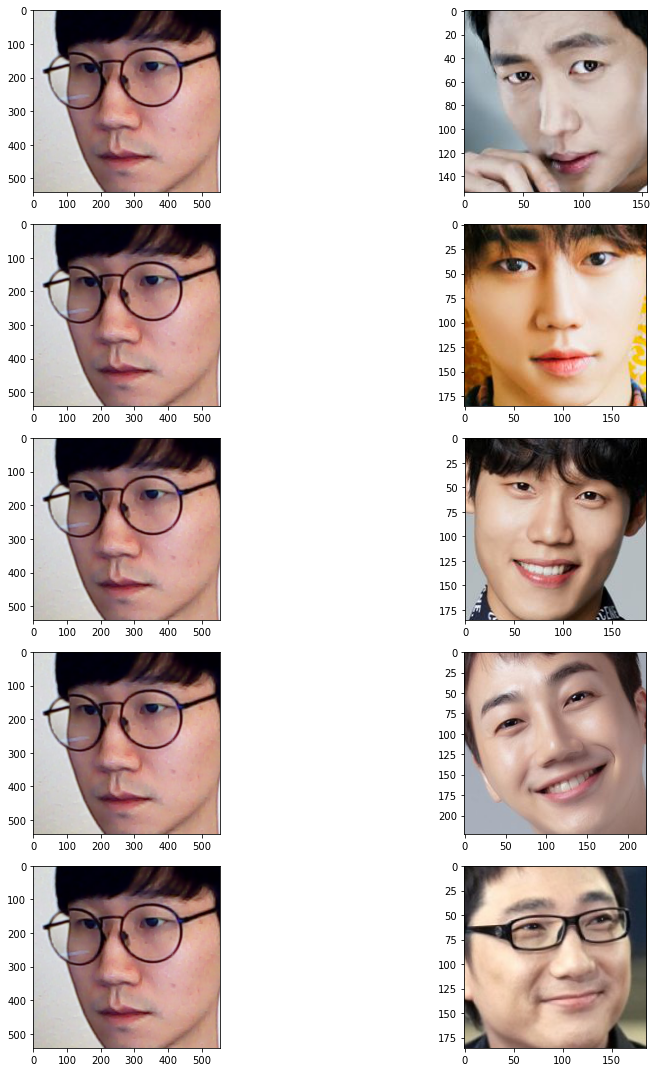

In [323]:
""""
matplotlib 라이브러리로 닮은꼴 순서대로 사진 비교 시각화
"""

rows = 5
cols = 2
axes = []
fig = plt.figure(figsize=(15, 15))

for i in range(rows):

    image_path = os.path.join(dir_path, "정현재_1.jpeg")
    me_face = get_cropped_face(image_path)
    axes.append(fig.add_subplot(rows, cols, 2*(i+1)-1))
    plt.imshow(me_face)

    image_path = os.path.join(dir_path, nearest_list_me[i] + ".jpeg")
    cropped_face = get_cropped_face(image_path)
    axes.append(fig.add_subplot(rows, cols, 2*(i+1)))
    plt.imshow(cropped_face)

fig.tight_layout()
plt.show()